# Data Cleaning Code-Along

Implement the code-blocks below in order to explore some common data-transformation techniques. We will be using the `realestate.xlsx` file again (with a twist).

## Data Cleaning I

Simple drops.

In [25]:
import pandas as pd
import numpy as np

In [26]:
# TODO: Load in your data from `../../data/realestate.xlsx`

df = pd.read_excel('../data/realestate.xlsx')

In [27]:
# TODO: Observe first 5 rows

...

Ellipsis

In [28]:
# TODO: Count how many null values we have

...

Ellipsis

In [29]:
# TODO: Let's drop these missing values, and save this new dataframe into a new var called "df_new"

df.head()

,No,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,32,84.87882,100.0,24.98298,121.54024,37.9
1,2,19.5,306.59470,9.0,24.98034,121.53951,42.2
2,3,13.3,561.98450,5.0,24.98746,121.54391,47.3
3,4,13.3,561.98450,5.0,24.98746,121.54391,54.8
4,5,5,390.56840,5.0,24.97937,121.54245,43.1


In [30]:
# TODO: Let's count our null values again
# seems like this is good to go right? ... (wrong)

df.isna().sum()

No                                         0
X2 house age                              11
X3 distance to the nearest MRT station     0
X4 number of convenience stores            1
X5 latitude                                0
X6 longitude                               0
Y house price of unit area                 0
dtype: int64

## Data Cleaning II

More advanced data cleaning/transforming techniques.

In [31]:
# TODO: is there anything that we are missing? let's take a look at our summary statistics
# What do you notice is not being reflected here? 

df_new.describe()

,No,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000
mean,206.987593,1070.118896,4.292804,24.969040,121.533590,38.106452
std,118.267962,1255.001088,5.636027,0.012365,0.015250,13.610588
min,1.000000,23.382840,-6.000000,24.932070,121.473530,7.600000
25%,105.500000,289.324800,1.000000,24.963010,121.529665,27.700000
50%,208.000000,492.231300,4.000000,24.971100,121.538740,38.600000
75%,308.500000,1442.932500,6.000000,24.977440,121.543395,46.600000
max,414.000000,6488.021000,100.000000,25.014590,121.566270,117.500000


In [32]:
# TODO: seems like our X2 column is not being treated as a numeric, let's see what's going on

df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 403 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      403 non-null    int64  
 1   X2 house age                            403 non-null    object 
 2   X3 distance to the nearest MRT station  403 non-null    float64
 3   X4 number of convenience stores         403 non-null    float64
 4   X5 latitude                             403 non-null    float64
 5   X6 longitude                            403 non-null    float64
 6   Y house price of unit area              403 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 25.2+ KB


In [39]:
# TODO: seems like our "X3 distance..." is being treated as an "object" aka string, let's attempt to fix this

df_new["X2 house age"] = df_new["X2 house age"].astype(float)

In [38]:
# TODO: It looks like there is some string data occasionally mixed with our numerics.
# Let's use "replace" instead!
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html

df_new["X2 house age"].replace(to_replace="\"BRAND NEW\"", value=0, inplace=True)

In [37]:
# TODO: Let's use "info" to see if our column is now being treated as a numeric

df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 403 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      403 non-null    int64  
 1   X2 house age                            403 non-null    object 
 2   X3 distance to the nearest MRT station  403 non-null    float64
 3   X4 number of convenience stores         403 non-null    float64
 4   X5 latitude                             403 non-null    float64
 5   X6 longitude                            403 non-null    float64
 6   Y house price of unit area              403 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 25.2+ KB


In [34]:
# TODO: Let's take a look at our 'describe' df again

df_new.describe()

,No,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000
mean,206.987593,1070.118896,4.292804,24.969040,121.533590,38.106452
std,118.267962,1255.001088,5.636027,0.012365,0.015250,13.610588
min,1.000000,23.382840,-6.000000,24.932070,121.473530,7.600000
25%,105.500000,289.324800,1.000000,24.963010,121.529665,27.700000
50%,208.000000,492.231300,4.000000,24.971100,121.538740,38.600000
75%,308.500000,1442.932500,6.000000,24.977440,121.543395,46.600000
max,414.000000,6488.021000,100.000000,25.014590,121.566270,117.500000


<Axes: ylabel='Frequency'>

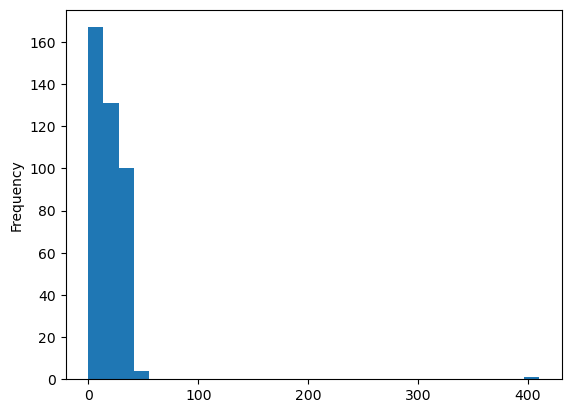

In [40]:
# TODO: Great! We removed missing values, as well as unexpected strings. However, there is still more...
# Notice the "skewness" of "X2 house age"
# Let's plot to see what's going on
# Documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.hist.html

df_new["X2 house age"].plot.hist(bins=30)

In [43]:
# TODO: If an outlier is not too extreme, we generally want to keep it (more data the better)
# However, this is a ridiculous value and most likely represents an erroneous value or an error in our collection-techniques
# Using boolean indexing, we will remove this
# Documentation: https://pandas.pydata.org/docs/user_guide/indexing.html#boolean-indexing

clean_df = df_new[df_new["X2 house age"] < 300]

<Axes: ylabel='Frequency'>

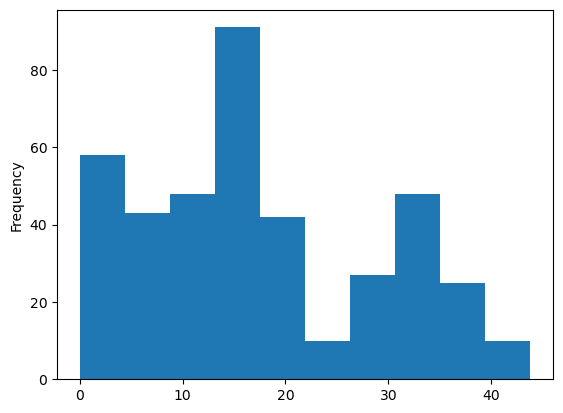

In [45]:
# TODO: Let's observe our distribution again... (looking better!)
# (we should do this check for ALL columns)

clean_df["X2 house age"].plot.hist()

In [ ]:
# TODO: Often times when we get a dataset, there is a row index label. This is often superfluous and unneeded in our analysis
# let's drop it, as well as Latitude & Longitude

...

In [ ]:
# TODO: Lastly, we should rename our columns for "ease of use"
# Documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html

...